# 단일선형회귀모델

In [ ]:
import numpy as np
import pandas as pd

## 단일선형회귀
독립변수와 종속변수 사이의 함수적 관계 - 추정/예측
 * 가정
 * 회귀 계수의 추정
 * 최소자승법


> 회귀 계수의 추정: 수집된 데이터에 가장 적절한 회귀 직선을 구하는 것





> 최소자승법: 잔차 제곱합이 최소가 되도록 회귀계수를 추정하는 것




## 적합도 검증
표본 회귀식이 종속변수의 값을 어느 정도 정확하게 예측할 수 있는가의 정도를 검증

 * 추정의 표준오차
 * 결정계수

 > 추정의 표준오차: 표본들의 실제 값이 표본 회귀선 주위로 흩어진 변동 측정



> 총 제곱합(SST) = 회귀제곱합(SSR) + 잔차제곱합(SSE)





> 결정계수(R_squared) = SSR / SST = 1 - (SSE / SST)



## 성능 평가
* 잔차
* MSE(Mean Squared Error, 평균제곱오차)
* RMESE(Root MSE)


# 실습 1

In [6]:
from sklearn import linear_model

In [ ]:
#산점도(산포도, Scatter Diagram)를 그리기 위한 모듈
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline #시각확 결과를 ipython notebook 안에서 출력하는 함수 
matplotlib.style.use("ggplot") #R의 ggplot style을 그래프에 적용하기 위함

데이터 만들기

In [7]:
data = {
    "x" : [13, 19, 16, 14, 15, 14],
    "y" : [40, 83, 62, 48, 58, 43]
}

data = pd.DataFrame(data) #데이터프레임으로 변환

산점도로 나타내기

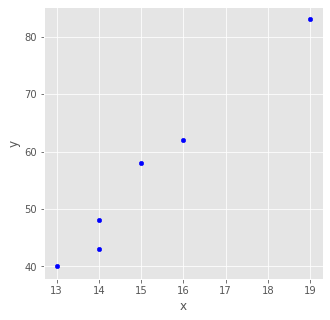

In [8]:
data.plot(kind = "scatter", #그래프 형식: 산점도
          x = "x", y = "y", #가로/세로 축의 라벨을 x, y로 설정 
          figsize = (5, 5),
          color = "blue")

단일선형회귀 모델 적합하기

In [9]:
linear_regression = linear_model.LinearRegression() #변수에 LinearRegression() 함수 할당

In [10]:
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"]) #fit()을 통해 선형 회귀 모델 적합

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print("a value = ", linear_regression.intercept_) #선형 회귀식의 세로축 절편(y절편)
print("b value = ", linear_regression.coef_) #선형 회귀식의 기울기

a value =  -55.48175182481753
b value =  [7.32846715]


적합도 검증

In [12]:
prediction = linear_regression.predict(X = pd.DataFrame(data["x"])) #위의 모델을 적용해 선형회귀 값 구하기

In [13]:
residuals = data["y"] - prediction #잔차 = 실제 - 예측

In [14]:
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [15]:
SSE = (residuals ** 2).sum() #잔차제곱합
print("SSE = ", SSE)

SST = ((data["y"] - data["y"].mean()) ** 2).sum() #y값의 표준편차의 제곱합
print("SST = ", SST)

R_squared = 1 - (SSE/SST) #결정계수
print("R_squared = ", R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


예측하여 plot으로 나타내기

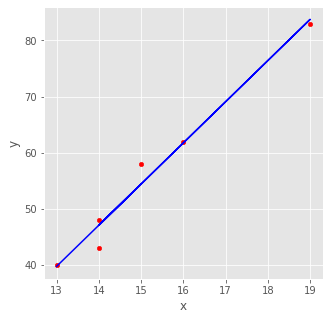

In [16]:
data.plot(kind = "scatter",x = "x", y = "y", figsize = (5, 5), color = "red")
plt.plot(data["x"], prediction, color = "blue") #회귀라인 추가

성능 평가

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
print("score = ", linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"])) #결정계수 R
print("MSE = ", mean_squared_error(prediction, data["y"])) #회귀식 값과 실제 값의 차이의 제곱
print("RMSE = ", mean_squared_error(prediction, data["y"]) ** 0.5)

score =  0.9753156179610034
MSE =  5.172749391727503
RMSE =  2.2743679103714736


# 실습 2

데이터 불러오기

In [20]:
from sklearn import datasets

In [22]:
boston_house_prices = datasets.load_boston() #보스턴 집 값 데이터 로드
boston_house_prices

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [25]:
print(boston_house_prices.keys()) #key 값 출력
print(boston_house_prices.data.shape) #전체 데이터 중 data에 대한 전체 행, 열 길이를 출력

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [27]:
print(boston_house_prices.feature_names, "\n") #컬럼명 출력
print(boston_house_prices.DESCR) #데이터의 세부적인 내용을 저장하고 있는 DESCR 데이터 출력

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial h

데이터 정제

In [28]:
data_frame = pd.DataFrame(boston_house_prices.data) #boston의 'data'를 데이터프레임으로 변환
data_frame.tail() #마지막 5개 행 출력

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [29]:
data_frame.columns = boston_house_prices.feature_names #컬럼명 변경

In [30]:
data_frame["Price"] = boston_house_prices.target #'Price' 컬럼 추가, target에 저장된 데이터 사용
data_frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


산점도 그리기

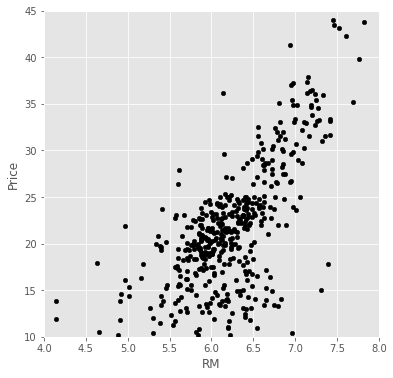

In [31]:
data_frame.plot(kind = "scatter", x = "RM", y = "Price", figsize = (6, 6), color = "black", xlim = (4, 8), ylim = (10, 45))

데이터 학습 시키기

In [33]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"])
prediction = linear_regression.predict(X = pd.DataFrame(data_frame["RM"]))

print("a value = ", linear_regression.intercept_)
print("b value = ", linear_regression.coef_)

a value =  -34.67062077643857
b value =  [9.10210898]


적합도 검증

In [34]:
residuals = data_frame["Price"] - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [35]:
SSE = (residuals ** 2).sum() #잔차제곱합
SST = ((data_frame["Price"] - data_frame["Price"].mean()) ** 2).sum() #y값의 표준편차의 제곱합
R_squared = 1 - (SSE/SST) #결정계수

print("R_squared = ", R_squared)

R_squared =  0.4835254559913341


예측하여 plot으로 나타내기

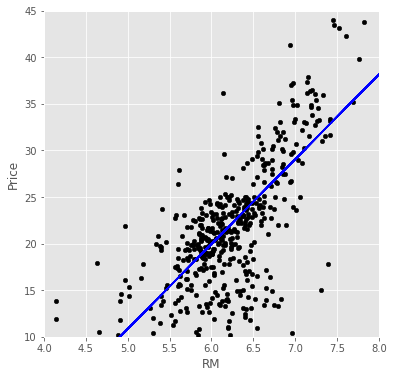

In [36]:
data_frame.plot(kind = "scatter", x = "RM", y = "Price", figsize = (6, 6), color = "black", xlim = (4, 8), ylim = (10, 45))
plt.plot(data_frame["RM"], prediction, color = "blue")

성능 평가

In [38]:
print("score = ", linear_regression.score(X = pd.DataFrame(data_frame["RM"]), y = data_frame["Price"]))
print("MSE = ", mean_squared_error(prediction, data_frame["Price"]))
print("RMSE = ", mean_squared_error(prediction, data_frame["Price"]) ** 0.5)

score =  0.4835254559913343
MSE =  43.60055177116956
RMSE =  6.603071389222561


## 교재 예제_자습

In [39]:
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
boston = load_boston() #데이터 셋 로드
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names) #데이터 프레임으로 변환

In [41]:
bostonDF["Price"] = boston.target #주택 가격 컬럼 추가

In [42]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [43]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


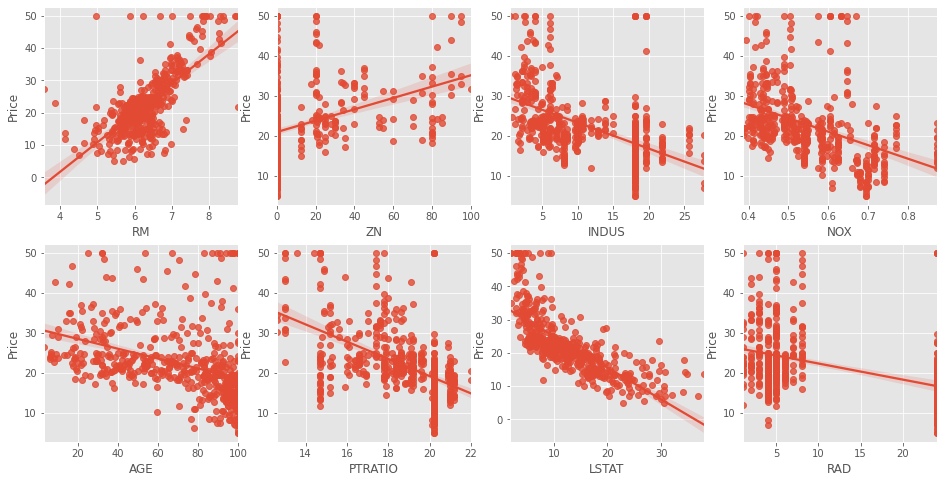

In [45]:
#각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
#seaborn 의 regplot() : 산점도와 회귀직선 동시에 그려줌
#matplotlib.subplots() : 여러개의 그래프를 한 번에 표현

fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]

for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i % 4

  sns.regplot(x = feature, y = "Price", data = bostonDF, ax = axs[row][col])

train_test_split()을 이용해 train/test data 분할

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [47]:
y_target = bostonDF["Price"]
X_data = bostonDF.drop(["Price"], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156) #데이터셋 분할 

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #회귀모델 적합

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_preds = lr.predict(X_test) #예측값

In [51]:
#회귀모델 성능평가
MSE = mean_squared_error(y_test, y_preds)
RMSE = np.sqrt(MSE)

print("MSE = {0:.3f}, RMSE = {1:.3F}".format(MSE, RMSE))
print("Variance Score = {0:.3f}".format(r2_score(y_test, y_preds)))

MSE = 17.297, RMSE = 4.159
Variance Score = 0.757


In [53]:
print("절편 값 = ", lr.intercept_)
print("회귀계수 값 = ", np.round(lr.coef_, 1))

절편 값 =  40.995595172164755
회귀계수 값 =  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [54]:
#회귀계수 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

cross validation 으로 train/test data 분할

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
y_target = bostonDF["Price"]
X_data = bostonDF.drop(["Price"], axis = 1, inplace = False)

In [57]:
lr = LinearRegression()

In [59]:
# K = 5 로 Cross Validation 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [60]:
#cross_val_score(scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print("각 fold의 개별 Negative MSE scores : ", np.round(neg_mse_scores, 2))
print("각 fold의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print("5개 folds의 평균 RMSE : {0:.3f}".format(avg_rmse))

각 fold의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
각 fold의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5개 folds의 평균 RMSE : 5.829
